# An Artificial Subword Translation Task

In [16]:
from itertools import product
import random

random.seed(25)
n: int = 8  # length of a sequence
k: int = 8  # length of a segment
alphabet: list[str] = ['0', '1']

def sigma(x: list[str], k: int) -> list[str]:
    return [''.join(i) for i in product(x, repeat=k)]
x = sigma(alphabet, k)

y = x[:]
random.shuffle(y)
seq_map = {i: j for i, j in zip(x, y)}
def pi(x: list[str]) -> list[str]:
    return [seq_map[i] for i in x]
print(seq_map)

{'00000000': '11111011', '00000001': '10111011', '00000010': '10001001', '00000011': '11101111', '00000100': '00000110', '00000101': '11011110', '00000110': '00100100', '00000111': '00100111', '00001000': '00110001', '00001001': '00000101', '00001010': '01011101', '00001011': '01100010', '00001100': '11010001', '00001101': '01110000', '00001110': '01010100', '00001111': '01010110', '00010000': '10011000', '00010001': '10110110', '00010010': '11011101', '00010011': '00111111', '00010100': '01100011', '00010101': '10111101', '00010110': '00000001', '00010111': '01101001', '00011000': '00111100', '00011001': '00001101', '00011010': '10000010', '00011011': '00101101', '00011100': '11101011', '00011101': '01100001', '00011110': '10101100', '00011111': '01100110', '00100000': '10110000', '00100001': '11001101', '00100010': '11011000', '00100011': '11110001', '00100100': '00111010', '00100101': '11000011', '00100110': '10011101', '00100111': '10101010', '00101000': '11111001', '00101001': '00

In [17]:
def tokenize(w: list[str], k: int) -> str:
    return ' '.join([l[i : i + k] for l in w for i in range(0, len(l), k)])

for k in (1, 2, 4, 8):
    with open(f'data_bits/train_{n}_{k}.tsv', 'w') as train_f:
        for i in range(9_000):
            w = [random.choice(x) for _ in range(n)]
            train_f.write(f'{tokenize(w, k)}\t{tokenize(pi(w), k)}\n')
            if k == 8 and i <= 5:
                print(f'{tokenize(w, k)}    {tokenize(pi(w), k)}')
    with open(f'data_bits/val_{n}_{k}.tsv', 'w') as train_f:
        for _ in range(1_000):
            w = [random.choice(x) for _ in range(n)]
            train_f.write(f'{tokenize(w, k)}\t{tokenize(pi(w), k)}\n')

01110110 10100100 10111001 10001101 01100000 10010011 10001101 10010111 00011100 01010100 01001011 11111111 00111111 01101100 01001010 11101101 00100001 01101100 10101110 00011101 01100110 01001100 01011010 00111011 00001001 01011110 11100110 01110000 10010110 10101000 00000011 10000111 10111100 01100001 00000111 01000101 11111001 10101011 10001110 10010001 01101000 11010111 01000110 11000011 00101001 00110000 10100101 10000011 11010010 11001111 01011010 01001100 10110110 11111110 00111111 00101100 00101111 11010110 11111100 00110001 11010011 01010110 01111111 01010010 00110101 11000010 11000010 00111101 10010010 00001110 00111001 10011101 10110000 00011011 11010011 10110110 00100010 00111100 10011010 11010000 01010000 10101001 10001000 10010010 00101001 00001110 01111111 10111001 11000111 00001000 00101110 01111001 11001110 01101000 10101011 01111111 10110001 11010111 11000100 00111111 11000001 10000010 01001100 11011000 01100001 01100110 01111101 01101110 10101110 11010111 01111010 0

In [18]:
from collections import Counter

for k in (1, 2, 4, 8):
    with open(f'data_bits/vocab_{n}_{k}.tsv', 'w') as vocab_f, open(f'data_bits/train_{n}_{k}.tsv') as train_f:
        counter = Counter()
        for line in train_f.readlines():
            for l in line.split():
                counter[l] += 1
        for l in counter:
            vocab_f.write(f'{l}\t{counter[l]}\n')
        if k == 8:
            print(counter)

Counter({'01101000': 9347, '10110000': 9280, '10001100': 9226, '11100001': 9223, '11011100': 9218, '10001000': 9217, '11010100': 9205, '01110001': 9196, '10101010': 9196, '01111000': 9193, '10101101': 9189, '01000010': 9186, '10110001': 9175, '01111011': 9174, '11110010': 9172, '10111100': 9169, '10101000': 9164, '00001100': 9154, '11011001': 9146, '10011100': 9146, '10000001': 9143, '01000111': 9141, '11101001': 9139, '11110011': 9138, '01001011': 9135, '10111111': 9135, '10011101': 9132, '00101101': 9128, '10111001': 9126, '01000101': 9122, '11111100': 9121, '11001101': 9121, '00011011': 9115, '01001100': 9114, '01000110': 9114, '01101110': 9114, '10111010': 9114, '10010000': 9113, '11001011': 9113, '10011011': 9110, '00100001': 9106, '01011010': 9103, '10001110': 9103, '10101100': 9098, '11000110': 9098, '10110100': 9097, '10010001': 9091, '00110010': 9091, '11000011': 9090, '00110110': 9089, '11011010': 9087, '11100011': 9087, '01100111': 9087, '11100110': 9086, '11100111': 9086, '

<hr>

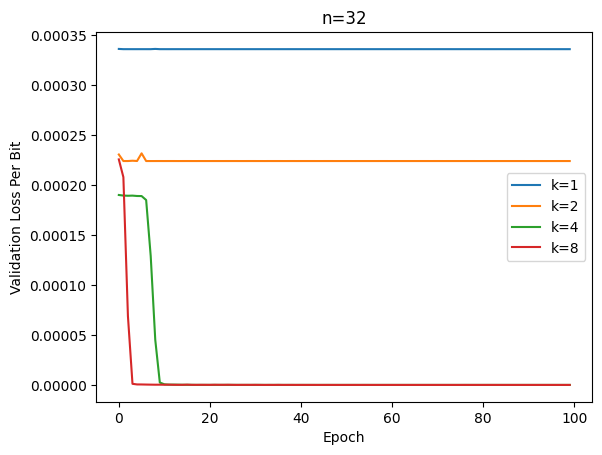

In [4]:
import matplotlib.pyplot as plt
import re

n: int = 32

plt.figure()
for k in (1, 2, 4, 8):
    with open(f'data_bits/model_{n}_{k}.log') as log_f:
        val_ppl = []
        for line in log_f.readlines():
            re_match = re.search(r'Validation Loss = ([0-9\.]+)', line)
            if re_match:
                val_ppl.append(float(re_match.group(1)))
        plt.plot(val_ppl, label=f'k={k}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss Per Bit')
plt.title(f'n={n}')
plt.legend()
plt.savefig(f'model_{n}.png', dpi=300)
plt.show()